# Plant Disease Prediction

# Importing Libaries

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
#### Training Images Preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "archive_Copy/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 13655 files belonging to 38 classes.


In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "archive/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

### Printing the 1st data in the training set.
We set Batch size = 32 i.e. one batch = 32 data points. so we are feeding 32 data points at a time to the neural network.
so here it prints first 32 image's rgb values (we choosed rgb) which has 128 X 128 shape (we mentioned using image_size parameter).

shape = (32,128,128,3)
- 32 - batch size
- 128 - height of single image
- 128 - width of single image
- 3 - represents rgb

In [13]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 87.    81.    83.  ]
   [ 83.25  77.25  79.25]
   [ 93.    87.    89.  ]
   ...
   [114.75 105.75 100.75]
   [114.75 105.75 100.75]
   [112.25 103.25  98.25]]

  [[ 88.5   82.5   84.5 ]
   [ 87.75  81.75  83.75]
   [ 92.25  86.25  88.25]
   ...
   [118.75 109.75 104.75]
   [112.   103.    98.  ]
   [117.   108.   103.  ]]

  [[ 89.25  83.25  85.25]
   [ 90.75  84.75  86.75]
   [ 93.75  87.75  89.75]
   ...
   [114.5  105.5  100.5 ]
   [115.75 106.75 101.75]
   [113.75 104.75  99.75]]

  ...

  [[148.5  147.5  152.5 ]
   [150.25 149.25 154.25]
   [151.   150.   155.  ]
   ...
   [151.5  148.5  155.5 ]
   [151.25 148.25 155.25]
   [151.5  148.5  155.5 ]]

  [[146.5  145.5  150.5 ]
   [146.5  145.5  150.5 ]
   [147.25 146.25 151.25]
   ...
   [147.25 144.25 151.25]
   [148.75 145.75 152.75]
   [146.5  143.5  150.5 ]]

  [[152.   151.   156.  ]
   [149.5  148.5  153.5 ]
   [148.25 147.25 152.25]
   ...
   [143.5  140.5  147.5 ]
   [146.   143.   150.  ]
   [153.25 150.25 15

# Building Model

# Covolution Neural Network
It has 3 layes mainly
- Convolution Layer - Conv2D
- Polling Layer - MaxPool2D
- Fully connected
#### see the CNN documentation

In [17]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential 

In [19]:
model = Sequential()

# To avoid overshooting
1. Choose small learning rate - default = 0.001 , we taking 0.0001
2. There may be a chance of underfitting, so increase the number of neurons
3. Add more convolution layers to extract more features from images. There may be possiblity that model unable to capture relevant features or model
is confusing due to lack of features - so feead with more feature

# Building the model with
**4 layes of 4 times of**
- 2 convolution layer
- 1 poolling layer

***At Last a flattern layer to flattern the image and one hidden layer with 1024 neurons/units***

In [23]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 32,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size = 2,strides=2))

C:\Users\SSN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.add(Conv2D(filters= 64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 64,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size = 2,strides=2))

In [27]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 128,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size = 2,strides=2))

In [29]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 256,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size = 2,strides=2))

In [31]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 512,kernel_size = 3,activation='relu'))
model.add(MaxPool2D(pool_size = 2,strides=2))

In [33]:
model.add(Dropout(0.25))  # drop 25 percent of layer to avoid over fitting

In [35]:
model.add(Flatten())

In [37]:
model.add(Dense(units = 1500,activation = 'relu'))

In [39]:
model.add(Dropout(0.4))

# output layer
**It has 38 units/neurons to predict probablity of the test sample belongs to 38 classes. For this we use softmax activation function**
- predicts output just like a logistic regression. probablity for belonging to that class

In [42]:
model.add(Dense(units=38,activation = 'softmax'))

# Compile Model

In [45]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [50]:
training_history = model.fit(x = training_set , validation_data = validation_set , epochs = 10)

Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 867s 2s/step - accuracy: 0.1153 - loss: 3.3221 - val_accuracy: 0.4940 - val_loss: 1.6883
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 875s 2s/step - accuracy: 0.5062 - loss: 1.6705 - val_accuracy: 0.6806 - val_loss: 1.0336
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 824s 2s/step - accuracy: 0.6716 - loss: 1.0696 - val_accuracy: 0.7250 - val_loss: 0.9146
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 612s 1s/step - accuracy: 0.7544 - loss: 0.7852 - val_accuracy: 0.7723 - val_loss: 0.7231
Epoch 5/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 636s 1s/step - accuracy: 0.8120 - loss: 0.5837 - val_accuracy: 0.8062 - val_loss: 0.6226
Epoch 6/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 634s 1s/step - accuracy: 0.8555 - loss: 0.4599 - val_accuracy: 0.8390 - val_loss: 0.5249
Epoch 7/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 639s 1s/step - accuracy: 0.8827 - loss: 0.3536 - val_accuracy: 0.8572 - val_loss: 0.4762
Epoch 8/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 940s 2s/step - accuracy: 0.8988 - loss: 0.3075 - val_accu

# Model Evaluation

In [55]:
# Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

427/427 ━━━━━━━━━━━━━━━━━━━━ 162s 379ms/step - accuracy: 0.9670 - loss: 0.0982


In [57]:
print(train_loss,train_acc)

0.0934256985783577 0.9696081876754761


In [59]:
#model on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 208s 379ms/step - accuracy: 0.8548 - loss: 0.5288


In [61]:
print(val_loss,val_acc )

0.5121145844459534 0.859321653842926


# Saving the Model

In [65]:
model.save("trained_model.keras")

In [67]:
training_history.history

{'accuracy': [0.23119735717773438,
  0.558696448802948,
  0.6936653256416321,
  0.7685096859931946,
  0.8293665051460266,
  0.8678140044212341,
  0.8882460594177246,
  0.9082387685775757,
  0.9306480884552002,
  0.9413401484489441],
 'loss': [2.7718210220336914,
  1.4748119115829468,
  0.9927185773849487,
  0.7304657697677612,
  0.5330629348754883,
  0.4112868010997772,
  0.34054169058799744,
  0.28247493505477905,
  0.20976686477661133,
  0.1796654313802719],
 'val_accuracy': [0.4939676821231842,
  0.6805713772773743,
  0.7249601483345032,
  0.7723082304000854,
  0.8061689138412476,
  0.8390052318572998,
  0.8571591377258301,
  0.8480536937713623,
  0.8543136715888977,
  0.859321653842926],
 'val_loss': [1.6882860660552979,
  1.0335859060287476,
  0.9145782589912415,
  0.7231054306030273,
  0.6225520968437195,
  0.5249306559562683,
  0.47622326016426086,
  0.5049183964729309,
  0.49530029296875,
  0.5121145844459534]}

In [69]:
# Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

# Accuracy Visualization

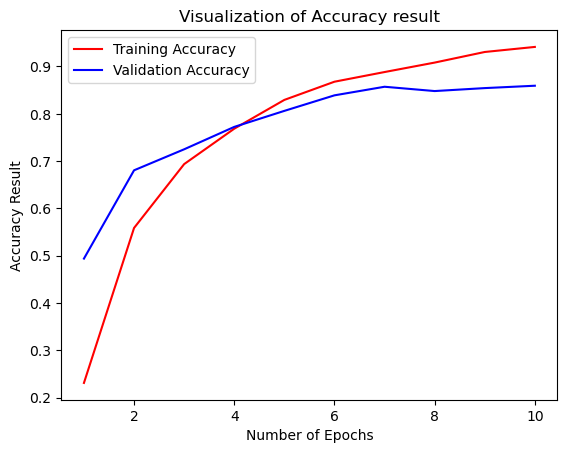

In [78]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy result")
plt.legend()
plt.show()

# More Evaluation Metrics

In [83]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [87]:
# we have only less samples in test set for the sake use the same validation set for testing
test_set = tf.keras.utils.image_dataset_from_directory(
    "archive/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle= False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [89]:
# making prediction
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 142s 258ms/step


array([[9.9882513e-01, 3.1134815e-04, 2.3924029e-08, ..., 3.7450842e-10,
        3.8320964e-11, 4.8492113e-09],
       [9.6814972e-01, 4.5735182e-04, 2.9758903e-07, ..., 7.6034176e-08,
        3.7859540e-08, 3.7582470e-06],
       [9.9999547e-01, 1.4714744e-06, 2.8875162e-09, ..., 7.6289771e-14,
        1.6408757e-13, 6.5819972e-10],
       ...,
       [1.1765336e-06, 1.5556097e-10, 4.5237073e-07, ..., 1.4031742e-10,
        8.8394575e-10, 9.9997413e-01],
       [1.8423964e-07, 8.1310991e-12, 4.0001520e-08, ..., 1.8761120e-10,
        5.5672938e-10, 9.9998760e-01],
       [8.4723693e-11, 1.4779256e-12, 1.7382562e-12, ..., 1.1838824e-13,
        6.4907885e-11, 9.9999964e-01]], dtype=float32)

It gives that, what is the probablity for each sample belongs to each clases, so we need to chooce one class from 38 classes which has the highest probablity for that single sample. hence shape of y_pred is (17572,38) where 17572 samples each has 32 probablities

In [92]:
y_pred.shape

(17572, 38)

In [96]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [98]:
true_category  = tf.concat([y for x,y in test_set],axis = 0)
true_category

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [102]:
y_true = tf.argmax(true_category,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [110]:
from sklearn.metrics import classification_report,confusion_matrix

In [108]:
cReport = classification_report(y_true,predicted_categories,target_names = class_names)
print(cReport)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.71      0.78       504
                                 Apple___Black_rot       0.81      0.91      0.86       497
                          Apple___Cedar_apple_rust       0.89      0.85      0.87       440
                                   Apple___healthy       0.68      0.87      0.76       502
                               Blueberry___healthy       0.95      0.78      0.85       454
          Cherry_(including_sour)___Powdery_mildew       0.91      0.87      0.89       421
                 Cherry_(including_sour)___healthy       0.97      0.90      0.93       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.73      0.93      0.82       410
                       Corn_(maize)___Common_rust_       0.97      0.97      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.85      0.

In [112]:
CMatrix = confusion_matrix(y_true,predicted_categories)
CMatrix

array([[356,  15,   6, ...,   0,   0,   1],
       [  1, 453,   0, ...,   0,   0,   0],
       [  0,   0, 372, ...,   5,   0,   1],
       ...,
       [  0,   0,   3, ..., 454,   0,   0],
       [  0,   1,   0, ...,   0, 422,   0],
       [  3,   0,   2, ...,   0,   1, 457]], dtype=int64)

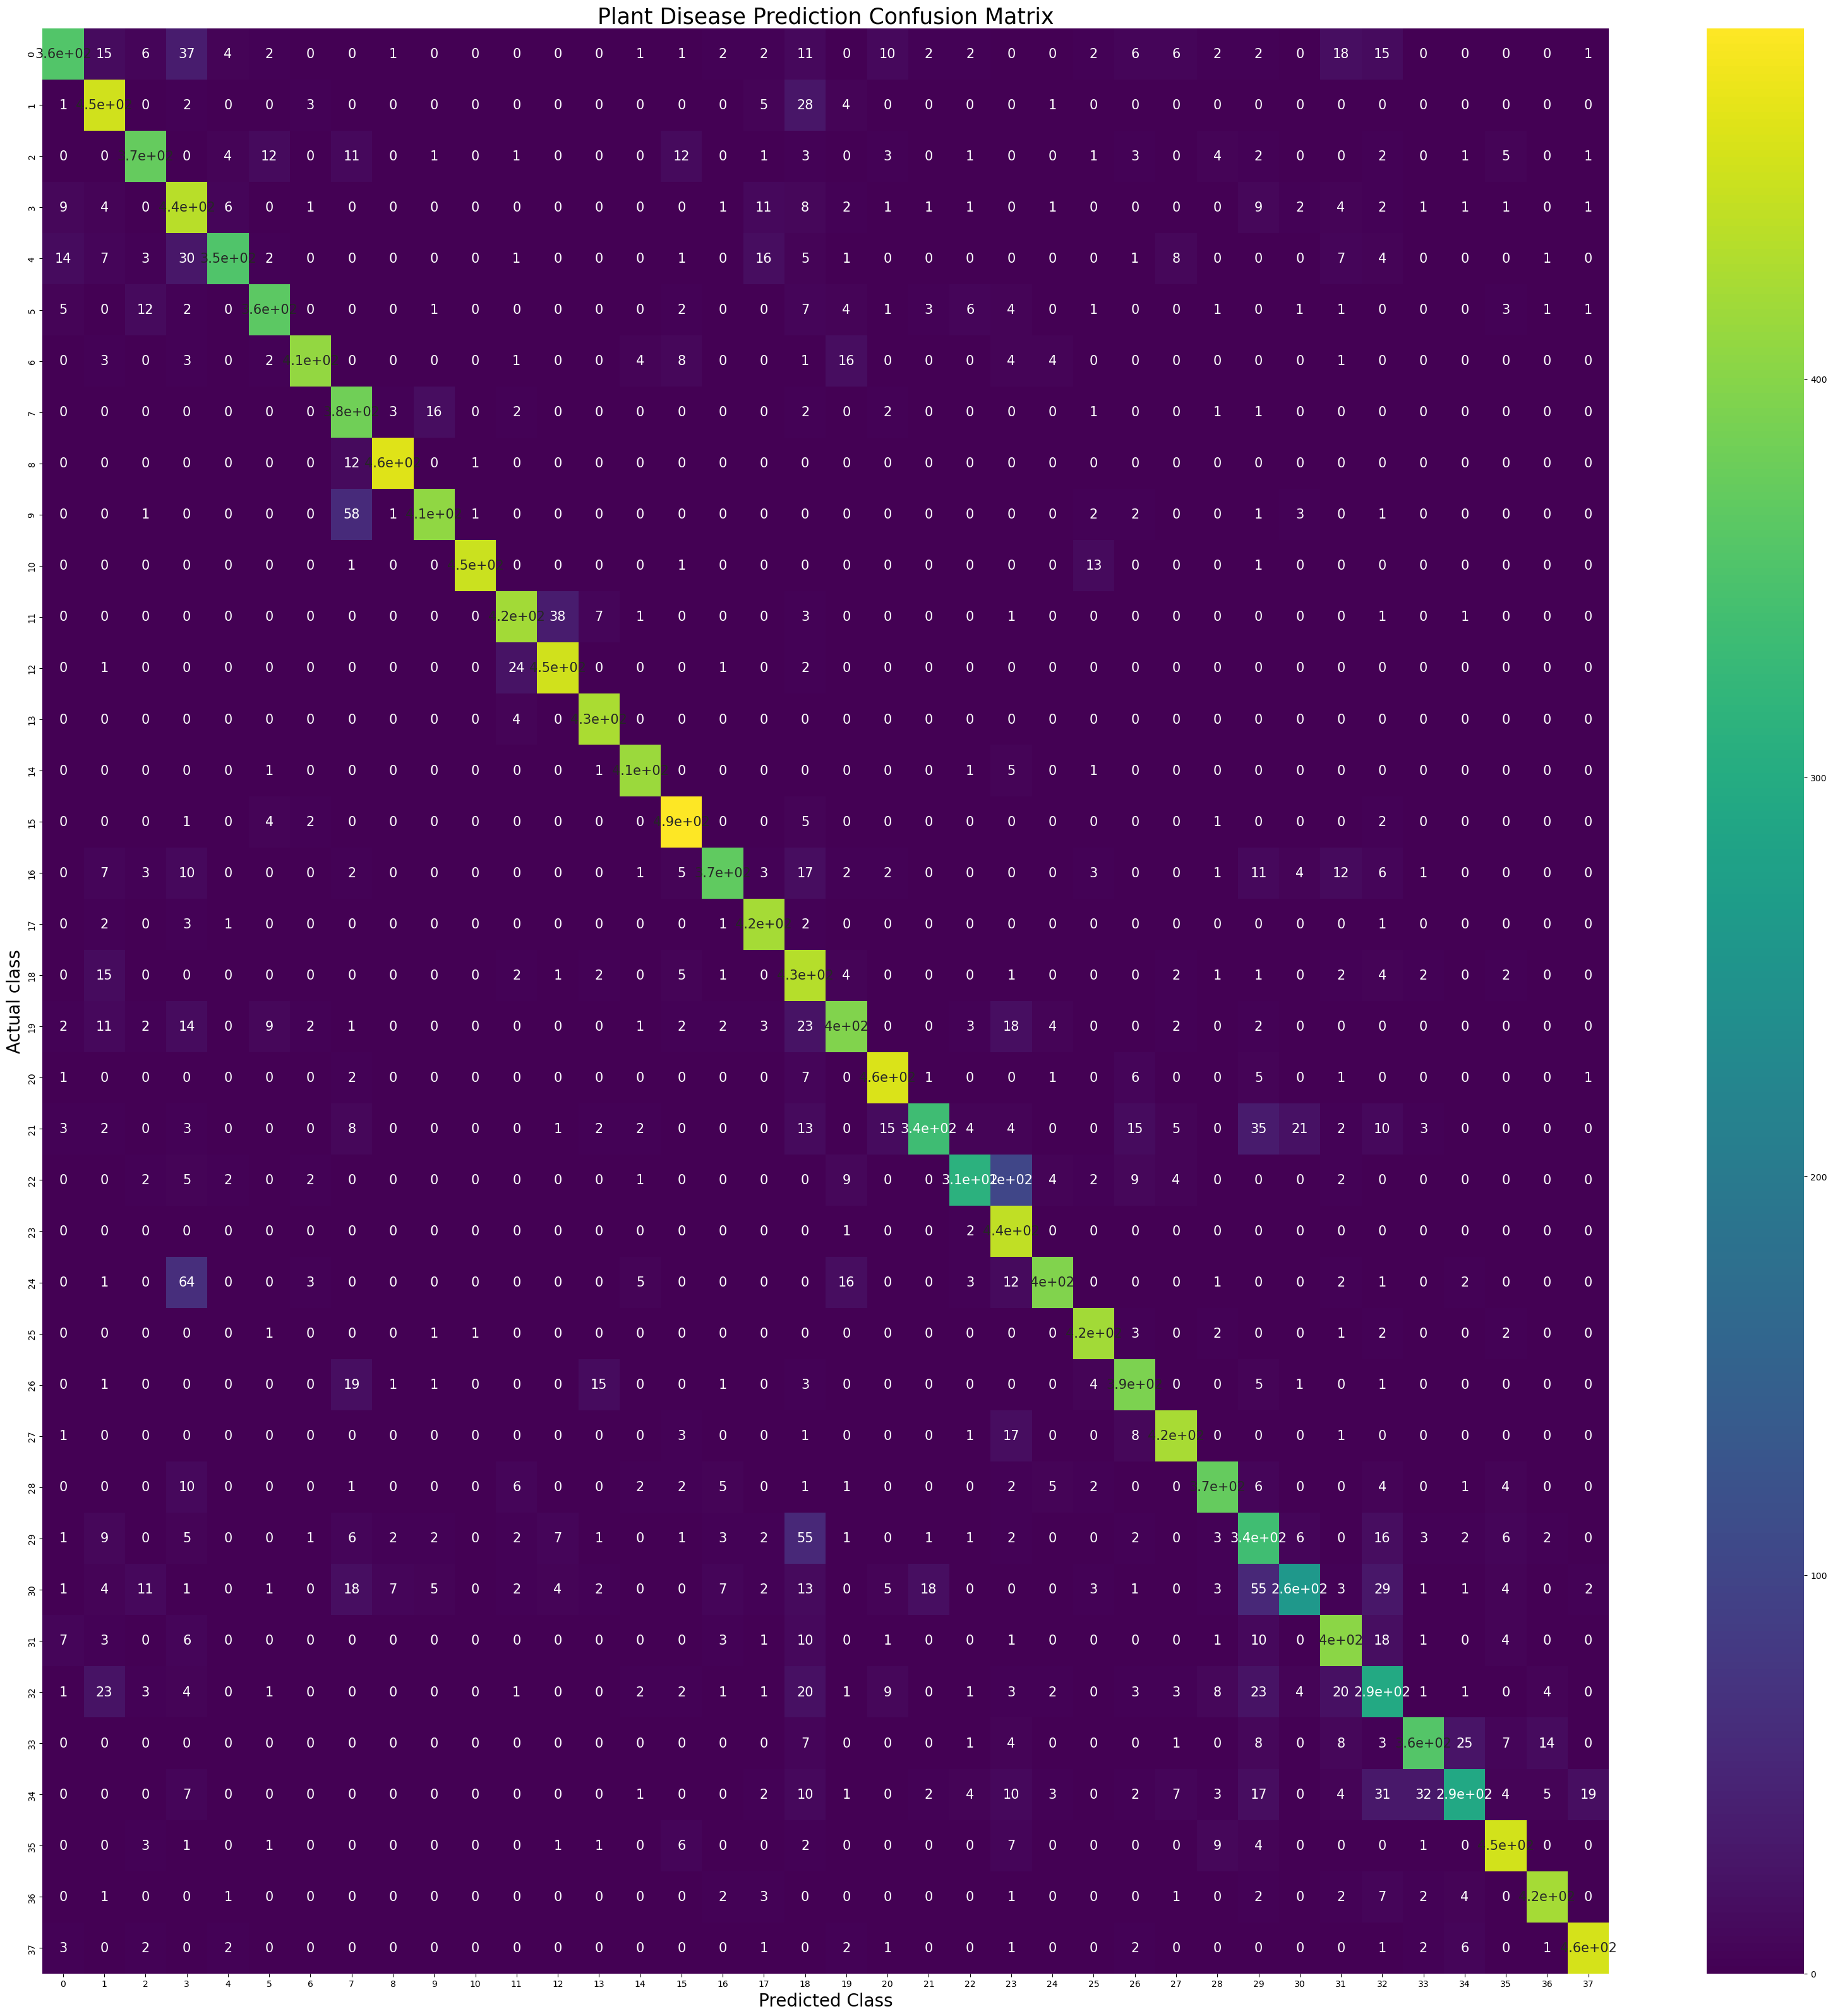

In [124]:
plt.figure(figsize = (40,40))
sns.heatmap(CMatrix,annot=True,cmap = 'viridis',annot_kws = {'size':15})
plt.xlabel("Predicted Class",fontsize = 20)
plt.ylabel("Actual class",fontsize = 20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize = 25)
plt.show()